# Overview
This notebook attempts explorative sentiment analysis of Tweets in London to determine the analyzer to be used. 

# Textblob

Based largely this tutorial/workshop: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

First, access some data from the database. Sampling strategy does not really matter here. 

In [1]:
import psycopg2

CONN_DB = ""
PATH = ""

con=psycopg2.connect(CONN_DB)
cur=con.cursor()
cur.execute("select tweet_id, tweet_text from london_twitter LIMIT 10000") 
query_result = cur.fetchall()
con.close()

Then, create the necessary pandas dataframe and do some exploration. 

In [2]:
import pandas as pd

data = pd.DataFrame(data=[tweet[1] for tweet in query_result], columns=['tweet_text'])
display(data.head(10))

,tweet_text
0,Made for superstardom. 🙋🏻‍♀️ #backingsinger #c...
1,Not a chance of anything being caught in the s...
2,"It’s been a busy summer for the ladies, but we..."
3,Belle Imaging - Bespoke and Afordable Architec...
4,Some Sunday colour to boost your imagination a...
5,#Amazing #Members #event @aphrashemza #mayfair...
6,Good morning! #wheresthesun https://t.co/gZdxA...
7,End of season social flightclubdarts was aweso...
8,Making music with family 🌞 I am so blessed. mo...
9,#MatchDay - We are @Arsenal and we are here !!...


In [4]:
from textblob import TextBlob
import re
import numpy as np

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [5]:
data['text_cleaned'] = np.array([clean_tweet(tweet) for tweet in data['tweet_text']])
data['polarity'] = np.array([analyze_sentiment(tweet) for tweet in data['text_cleaned'] ])
display(data.head(10))

,tweet_text,text_cleaned,polarity
0,Made for superstardom. 🙋🏻‍♀️ #backingsinger #c...,Made for superstardom backingsinger chooselove,0.000000
1,Not a chance of anything being caught in the s...,Not a chance of anything being caught in the s...,0.416667
2,"It’s been a busy summer for the ladies, but we...",It s been a busy summer for the ladies but we ...,0.068750
3,Belle Imaging - Bespoke and Afordable Architec...,Belle Imaging Bespoke and Afordable Architectu...,0.000000
4,Some Sunday colour to boost your imagination a...,Some Sunday colour to boost your imagination a...,0.000000
5,#Amazing #Members #event @aphrashemza #mayfair...,Amazing Members event mayfairartweekend light ...,0.500000
6,Good morning! #wheresthesun https://t.co/gZdxA...,Good morning wheresthesun,0.700000
7,End of season social flightclubdarts was aweso...,End of season social flightclubdarts was aweso...,0.344444
8,Making music with family 🌞 I am so blessed. mo...,Making music with family I am so blessed monke...,0.000000
9,#MatchDay - We are @Arsenal and we are here !!...,MatchDay We are and we are here SizenzaZonke,0.000000


Analysing the results:

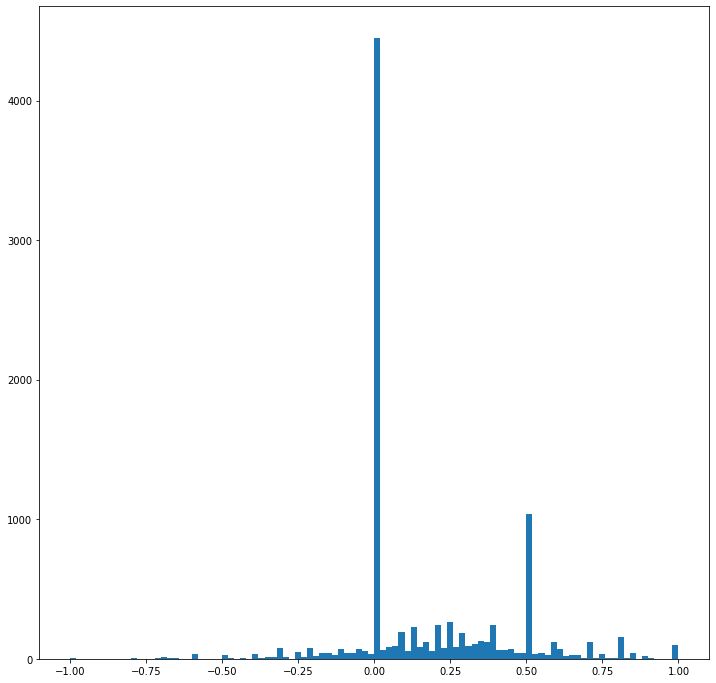

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(2,figsize=(12,12))
plt.hist(data['polarity'], bins = 100)
plt.show()

In [7]:
neu_tweets = [ tweet for index, tweet in enumerate(data['tweet_text']) if data['polarity'][index] >= -0.5 and data['polarity'][index] <= 0.5]
pos_tweets = [ tweet for index, tweet in enumerate(data['tweet_text']) if data['polarity'][index] > 0.5]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweet_text']) if data['polarity'][index] < -0.5]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweet_text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweet_text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweet_text'])))


Percentage of positive tweets: 8.91%
Percentage of neutral tweets: 90.32%
Percentage of negative tweets: 0.77%


In [8]:
for tweet in neg_tweets:
    print(tweet)

BECAUSE WE FUCKING OVERPAID TYLER BOZAK https://t.co/DgZZ3g9UJO
Badly pimped Ofo @ofo_bicycleUK Royal London hospital Stepney Way. https://t.co/1UrtH4fEBV
Just checked my bank account. 

Terrible idea that one. https://t.co/QLsGOQaq3M
This crazy https://t.co/IC4aKF3gS9
Friday shade #shoreditchtales #poser #idiot (📸 @curt60d) @ RAF Bentwaters https://t.co/3SzRfZpJYf
Doing some #volunteering for #coastalwestsussexmind at the #ryancup2018 #charityevent - bloody roasting! @ Worthing Rugby Club https://t.co/eTMP0bHUNI
Photo from Southend 'stabbing' shows blood-stained pavement https://t.co/uBV1S3uaTy https://t.co/HdGg9sWB34
Mr Sun is kinda hiding today but it’s not too bad.. #daffodils #spring #london #april @ St… https://t.co/F8u5VxLB5j
Serious pain going on really awful feet and yuk going on https://t.co/5EZozRhztv
Brutal #Barre Balance session with these babes ashleybverma &amp; theldnyogi although I was missing… https://t.co/K2lkQQ8zNe
In the hustle and bustle of this gorgeously crude c

Conclusions from the exploration: 
- works fast enough for larger data volumes
- Tweets seem to have positive bias (in line with other research)
- only more extreme polarity values show sufficient accuracy 
- most Tweets (around 50%) get classified as completely neutral (polarity = 0)

# TF-IDF and Logistic Regression with sentiment140
The notebooks on twitter sentiment analysis from https://github.com/tthustla/ show that, despite all the efforts, TF-IDF and logistic regression outperform most of the other tested combinations, which included Word2Vec, Doc2Vec, and neural networks, and mostly scored between 72% and 78% accuracy. 

Another notebook (https://www.bonaccorso.eu/2017/08/07/twitter-sentiment-analysis-with-gensim-word2vec-and-keras-convolutional-networks/) confirms the findings.

This analysis uses the Sentiment140 cleaned Tweets. For more info on how this was generated, see https://github.com/tthustla/twitter_sentiment_analysis_part2

The code below saves a sample for manual validation, and writes the computed values to a field sentpos_tfidflr. For larger Tweet counts, this will take a while and it is recommended to run the code not in a Jupyter notebook but a standalone script. 

In [ ]:
import pickle
import pandas as pd
import numpy as np
import psycopg2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer()
n_features = 100000
ngram_range= (1,3)
stop_words = None
classifier = LogisticRegression()
vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
classifier.set_params(solver='liblinear') #default was changed to lbfgs
pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', classifier)])

csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
x = my_df.text 
y = my_df.target # the target label (sentiment)

conn=psycopg2.connect("")
cur = conn.cursor()
cur.execute("select tweet_text from london_twitter where tweet_lang='en' and bot is not True")
tw_texts_en = cur.fetchall()
print(len(tw_texts_en))

sentiment_fit = pipeline.fit(x,y)

london_x_en = pd.Series((t[0] for t in tw_texts_en))
display(london_x_en.head())

london_y_pred_en = sentiment_fit.predict(london_x_en)
london_y_proba_en = sentiment_fit.predict_proba(london_x_en)
london_y_full_combo_en = []
sentiment_count_en = [0,0,0]
for i in range(len(london_y_pred_en)):
    if london_y_proba_en[i][0] > 0.75:
        sentiment = 0
        sentiment_count_en[0]+=1
    elif london_y_proba_en[i][1] > 0.90:
        sentiment = 2
        sentiment_count_en[2]+=1
    else: 
        sentiment = 1
        sentiment_count_en[1]+=1
    london_y_full_combo_en.append([london_x_en[i], london_y_pred_en[i], london_y_proba_en[i][0], london_y_proba_en[i][1], sentiment])
    data = (london_y_proba_en[i][1], tw_texts_en[i][0])
    cur.execute("""update london_twitter set sentpos_tfidflr=(%s) where tweet_id=(%s);""", data)
    conn.commit()

display(london_y_full_combo_en[1])
display(sentiment_count_en)

import csv
from random import sample

london_negative_en = sample([tweet for tweet in london_y_full_combo_en if tweet[4] == 0],500)
london_neutral_en = sample([tweet for tweet in london_y_full_combo_en if tweet[4] == 1],500)
london_positive_en = sample([tweet for tweet in london_y_full_combo_en if tweet[4] == 2],500)

with open('sent140_TF-IDF_LR_london_v3_en_nobots_sample.csv', 'w', encoding='utf-8', newline = '') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    london_sample = london_negative_en + london_neutral_en + london_positive_en
    for row in london_sample:
        row[0] = row[0].replace("\n", "")
        row[0] = row[0].replace("\r", "")
        wr.writerow(row)
        
conn.close()

# VADER

In [1]:
import numpy as np
import psycopg2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

conn=psycopg2.connect("")
cur = conn.cursor()
cur.execute("select tweet_id, tweet_text from london_twitter where tweet_lang='en' and bot is not True")
tw_texts_en = cur.fetchall()
conn.close()
print(len(tw_texts_en))

analyzer = SentimentIntensityAnalyzer()
sentiment_count_en = [0,0,0]
london_full_combo_en = []

4113234


In [38]:
%%time
for t in tw_texts_en:
    vs = analyzer.polarity_scores(t[0])
    if vs['compound'] <= -0.05:
        sentiment = 0
        sentiment_count_en[0] += 1
    elif vs['compound'] >= 0.05:
        sentiment = 2
        sentiment_count_en[2]+=1
    else: 
        sentiment = 1
        sentiment_count_en[1] += 1
    london_full_combo_en.append([t[0], vs['compound'], sentiment])
display(london_full_combo_en[1])
display(sentiment_count_en)

['The outcome is known before it happens https://t.co/DltkJYvZme', 0.0, 1]

[331293, 1224220, 2450664]

Wall time: 23min 59s


In [39]:
import csv
from random import sample

london_negative_en = sample([tweet for tweet in london_full_combo_en if tweet[2] == 0],500)
london_neutral_en = sample([tweet for tweet in london_full_combo_en if tweet[2] == 1],500)
london_positive_en = sample([tweet for tweet in london_full_combo_en if tweet[2] == 2],500)

with open('VADER_london_en_nobots_sample.csv', 'w', encoding='utf-8', newline = '') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    london_sample = london_negative_en + london_neutral_en + london_positive_en
    for row in london_sample:
        row[0] = row[0].replace("\n", "")
        row[0] = row[0].replace("\r", "")
        wr.writerow(row)

The evaluation revealed that the handling of emojis is not optimal. In particular, a common heart emoji is not recognized (see last example sentence):

In [56]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all",  # Capitalized negation
             "Me and Fay are 4 years old today ❤️ (ft Grumio)… https://t.co/PZf0ntva8W"
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

The problem is in the polarity_scores function where the emojis get converted into their textual description (which is then used to check against the lexicon in the sentiment_valence function:

```
for chr in text:
    if chr in self.emojis:
        # get the textual description
        description = self.emojis[chr]
        if not prev_space:
            text_no_emoji += ' '
            text_no_emoji += description
            prev_space = False
        else:
            text_no_emoji += chr
            prev_space = chr == ' '
text = text_no_emoji.strip()
```

The problem is that any code point after the first gets added to the last word of the description. If that last word is the one to be found in the lexicon, the sentiment_valence function will miss it. So, in case of ☹️ ("frowning face") the word found in the lexicon is "frowning", and in case of ❤️ ("red heart") it's "heart". Testing showed that the former works (so the problem does not occur with all emojis with multiple code points), the latter does not.
The problem only occurs when the lexicon word is the last word of the emoji description, because the loop only looks at the first code point to find the description, but then adds the second code point to the last word of that description. This changes the last character of that unigram, making the sentiment_valence look-up miss it. The change is barely visible in control print outs (e.g. the letter "t" becomes a tiny bit smaller).

How to fix it? Dealing properly with emojis with multiple code points would need some serious changes in the loop. We have chosen for a quick and dirty fix: Since the major culprit for sentiment-relevant emojis is "FE0F", we changed the ```else:``` statement into ```elif ord(chr) != 65039:``` to completely ignore it. Seems to work.

The VADER sentiment analysis was conducted using the script vaderSentiment_mod.py